<img src='../images/cbslogo.jpg' width="30%" align="left" />

# Entfernungen zwischen den Capital Bikeshare Fahrradstationen
## - Phase: Data Understanding -

Die Ziele dieses Notebooks sind die Analyse der Entfernungen zwischen den Fahrradstationen, welche durch eine Luftlinienberechnung der Start- und Endstationen durchgeführt wurden sowie die Darstellung der Sehenswürdigkeiten und Fahrradstationen auf einer Karte.

Dieses Notebook nutzt die folgenden Dateien:
    trips_raw.pkl,
    Station_Data.csv,
    trips_clean.pkl,
    sightseeing_coordinates.pkl
    
Folgende Dateien werden durch dieses Notebook erzeugt: 
    station_location.pkl,
    airdistance_tripdata_coordinates.pkl  
    
    

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopy.distance
from datetime import date
from workalendar.core import Calendar

In [21]:
RAWDATA_PATH = '../data/raw'
DATA_PATH = '../data/'
TRIPS_FILE = 'trips_raw.pkl'
STATION_LOCATION = RAWDATA_PATH+'/Station_Data.csv'

In [22]:
df_station_data = pd.read_csv(STATION_LOCATION)

In [23]:
df_station_data.to_pickle(DATA_PATH+'station_location.pkl')

In [24]:
df_trips=pd.read_pickle(DATA_PATH+'trips_clean.pkl')

In [25]:
df_station_data = df_station_data[['TERMINAL_NUMBER', 'LATITUDE', 'LONGITUDE']]

In [26]:
df_station_data.head()

,TERMINAL_NUMBER,LATITUDE,LONGITUDE
0,31612,38.894758,-76.997114
1,31226,38.916442,-77.068200
2,31227,38.900283,-77.029822
3,31228,38.899700,-77.023086
4,31504,38.932514,-76.992889


In [27]:
# Wie viele Werte sind pro Spalte vorhanden und nicht null?
# Ergebnis: 596 Stationen
df_station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TERMINAL_NUMBER  596 non-null    int64  
 1   LATITUDE         596 non-null    float64
 2   LONGITUDE        596 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 14.1 KB


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [29]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # Dezimal Zahlen  umrechnen 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine Formel 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Erdradius:
    erdradius = 6371 * c
    return erdradius * 1000 

In [30]:
def listenMethode(longst1, latst1, longst2, latst2):
    ergebnislist = [];
    x = 0;
    while x < len(longst1):
        t = haversine(longst1[x], latst1[x],longst2[x],latst2[x])
        ergebnislist.append(t)
        x = x+1
    return ergebnislist

In [31]:
df_complete =pd.merge(df_trips, df_station_data, right_on='TERMINAL_NUMBER', left_on='start_station_id').drop('TERMINAL_NUMBER', axis=1).rename(columns={'LATITUDE':'Latitude_start_station', 'LONGITUDE':'Longitude_start_station'})

In [32]:
df_complete =pd.merge(df_complete, df_station_data, right_on='TERMINAL_NUMBER', left_on='end_station_id').drop('TERMINAL_NUMBER', axis=1).rename(columns={'LATITUDE':'Latitude_end_station', 'LONGITUDE':'Longitude_end_station'})

In [33]:
# Einführung eines neuen Dataframes zum Speichern der Entfernungen
df_station_data_test = df_complete


In [34]:
# Hier soll für jede Zeile im Dataframe der  Wert für Entfernung gefüllt werden
# Pseudocode
# For each Zeile  do
# haversine(Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station)
# Schreibe das Ergebnis in das Feld AirDistance der Zeile
# Wiederhole es für jede Zeile


In [35]:
df_station_data_test

,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station
0,2015-10-15 10:58:35,2015-10-15 14:57:10,31219,31634,?(0x0000000074BEBCE4),Member,2015-10-15,10,2015-10-15,14,38.893028,-77.026013,38.875010,-77.002400
1,2016-07-08 20:44:21,2016-07-08 21:11:54,31219,31634,W00099,Casual,2016-07-08,20,2016-07-08,21,38.893028,-77.026013,38.875010,-77.002400
2,2017-10-14 19:47:46,2017-10-14 20:02:32,31219,31634,W00139,Member,2017-10-14,19,2017-10-14,20,38.893028,-77.026013,38.875010,-77.002400
3,2017-05-14 15:50:53,2017-05-14 16:33:31,31219,31634,W00242,Casual,2017-05-14,15,2017-05-14,16,38.893028,-77.026013,38.875010,-77.002400
4,2016-06-22 19:03:37,2016-06-22 19:20:51,31219,31634,W00277,Member,2016-06-22,19,2016-06-22,19,38.893028,-77.026013,38.875010,-77.002400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232877,2017-10-14 12:46:54,2017-10-14 13:14:53,32211,32211,W23202,Casual,2017-10-14,12,2017-10-14,13,38.962095,-77.358815,38.962095,-77.358815
10232878,2017-06-18 12:34:17,2017-06-18 16:42:29,32211,32211,W23247,Casual,2017-06-18,12,2017-06-18,16,38.962095,-77.358815,38.962095,-77.358815
10232879,2017-08-06 18:42:16,2017-08-06 19:12:20,32211,32211,W23247,Casual,2017-08-06,18,2017-08-06,19,38.962095,-77.358815,38.962095,-77.358815
10232880,2016-11-05 19:12:56,2016-11-05 20:11:14,32211,32211,W23261,Casual,2016-11-05,19,2016-11-05,20,38.962095,-77.358815,38.962095,-77.358815


In [36]:
df_station_data_test

,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station
0,2015-10-15 10:58:35,2015-10-15 14:57:10,31219,31634,?(0x0000000074BEBCE4),Member,2015-10-15,10,2015-10-15,14,38.893028,-77.026013,38.875010,-77.002400
1,2016-07-08 20:44:21,2016-07-08 21:11:54,31219,31634,W00099,Casual,2016-07-08,20,2016-07-08,21,38.893028,-77.026013,38.875010,-77.002400
2,2017-10-14 19:47:46,2017-10-14 20:02:32,31219,31634,W00139,Member,2017-10-14,19,2017-10-14,20,38.893028,-77.026013,38.875010,-77.002400
3,2017-05-14 15:50:53,2017-05-14 16:33:31,31219,31634,W00242,Casual,2017-05-14,15,2017-05-14,16,38.893028,-77.026013,38.875010,-77.002400
4,2016-06-22 19:03:37,2016-06-22 19:20:51,31219,31634,W00277,Member,2016-06-22,19,2016-06-22,19,38.893028,-77.026013,38.875010,-77.002400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232877,2017-10-14 12:46:54,2017-10-14 13:14:53,32211,32211,W23202,Casual,2017-10-14,12,2017-10-14,13,38.962095,-77.358815,38.962095,-77.358815
10232878,2017-06-18 12:34:17,2017-06-18 16:42:29,32211,32211,W23247,Casual,2017-06-18,12,2017-06-18,16,38.962095,-77.358815,38.962095,-77.358815
10232879,2017-08-06 18:42:16,2017-08-06 19:12:20,32211,32211,W23247,Casual,2017-08-06,18,2017-08-06,19,38.962095,-77.358815,38.962095,-77.358815
10232880,2016-11-05 19:12:56,2016-11-05 20:11:14,32211,32211,W23261,Casual,2016-11-05,19,2016-11-05,20,38.962095,-77.358815,38.962095,-77.358815


In [37]:
df_station_data_test.head()

,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station
0,2015-10-15 10:58:35,2015-10-15 14:57:10,31219,31634,?(0x0000000074BEBCE4),Member,2015-10-15,10,2015-10-15,14,38.893028,-77.026013,38.87501,-77.0024
1,2016-07-08 20:44:21,2016-07-08 21:11:54,31219,31634,W00099,Casual,2016-07-08,20,2016-07-08,21,38.893028,-77.026013,38.87501,-77.0024
2,2017-10-14 19:47:46,2017-10-14 20:02:32,31219,31634,W00139,Member,2017-10-14,19,2017-10-14,20,38.893028,-77.026013,38.87501,-77.0024
3,2017-05-14 15:50:53,2017-05-14 16:33:31,31219,31634,W00242,Casual,2017-05-14,15,2017-05-14,16,38.893028,-77.026013,38.87501,-77.0024
4,2016-06-22 19:03:37,2016-06-22 19:20:51,31219,31634,W00277,Member,2016-06-22,19,2016-06-22,19,38.893028,-77.026013,38.87501,-77.0024


In [38]:
#list Airdistance2 = df_station_data_test.loc.apply[haversine(df_station_data_test.loc.Longitude_start_station,df_station_data_test.loc.Latitude_start_station, df_station_data_test.loc.Longitude_end_station,df_station_data_test.loc.Latitude_end_station)]
#BerechnungDistanceProZeile(df_station_data_test)
#Airdistance2

Lst_long_start_station = list(df_station_data_test["Longitude_start_station"])
len(Lst_long_start_station)

10232882

In [39]:
Lst_long_end_station = list(df_station_data_test["Longitude_end_station"])
len(Lst_long_end_station)

10232882

In [40]:
Lst_lat_end_station = list(df_station_data_test["Latitude_end_station"])
len(Lst_lat_end_station)

10232882

In [41]:
Lst_lat_start_station = list(df_station_data_test["Latitude_start_station"])
len(Lst_lat_start_station)

10232882

In [42]:
# Reihenfolge der Parameter: longst1, latst1, longst2, latst2):
ergebnislist = listenMethode(Lst_long_start_station,Lst_lat_start_station,Lst_long_end_station,Lst_lat_end_station)

In [43]:
len(ergebnislist)

10232882

In [44]:
ergebnislist

[2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,
 2862.058435528746,


In [45]:
# Die Erzeugte Liste als Distanz an den Dataframe anhängen
df_station_data_test["distance_Float"] = pd.Series(ergebnislist)


In [46]:
df_station_data_test.head()

,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station,distance_Float
0,2015-10-15 10:58:35,2015-10-15 14:57:10,31219,31634,?(0x0000000074BEBCE4),Member,2015-10-15,10,2015-10-15,14,38.893028,-77.026013,38.87501,-77.0024,2862.058436
1,2016-07-08 20:44:21,2016-07-08 21:11:54,31219,31634,W00099,Casual,2016-07-08,20,2016-07-08,21,38.893028,-77.026013,38.87501,-77.0024,2862.058436
2,2017-10-14 19:47:46,2017-10-14 20:02:32,31219,31634,W00139,Member,2017-10-14,19,2017-10-14,20,38.893028,-77.026013,38.87501,-77.0024,2862.058436
3,2017-05-14 15:50:53,2017-05-14 16:33:31,31219,31634,W00242,Casual,2017-05-14,15,2017-05-14,16,38.893028,-77.026013,38.87501,-77.0024,2862.058436
4,2016-06-22 19:03:37,2016-06-22 19:20:51,31219,31634,W00277,Member,2016-06-22,19,2016-06-22,19,38.893028,-77.026013,38.87501,-77.0024,2862.058436


In [47]:
df_station_data_test.distance_Float.value_counts()

0.000000       383964
1471.487553     38819
1400.095493     33014
881.757354      25509
1805.147812     21935
                ...  
8952.927355         1
6356.254968         1
7670.931918         1
7226.973312         1
8535.910021         1
Name: distance_Float, Length: 49254, dtype: int64

In [48]:
df_station_data_test

,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station,distance_Float
0,2015-10-15 10:58:35,2015-10-15 14:57:10,31219,31634,?(0x0000000074BEBCE4),Member,2015-10-15,10,2015-10-15,14,38.893028,-77.026013,38.875010,-77.002400,2862.058436
1,2016-07-08 20:44:21,2016-07-08 21:11:54,31219,31634,W00099,Casual,2016-07-08,20,2016-07-08,21,38.893028,-77.026013,38.875010,-77.002400,2862.058436
2,2017-10-14 19:47:46,2017-10-14 20:02:32,31219,31634,W00139,Member,2017-10-14,19,2017-10-14,20,38.893028,-77.026013,38.875010,-77.002400,2862.058436
3,2017-05-14 15:50:53,2017-05-14 16:33:31,31219,31634,W00242,Casual,2017-05-14,15,2017-05-14,16,38.893028,-77.026013,38.875010,-77.002400,2862.058436
4,2016-06-22 19:03:37,2016-06-22 19:20:51,31219,31634,W00277,Member,2016-06-22,19,2016-06-22,19,38.893028,-77.026013,38.875010,-77.002400,2862.058436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232877,2017-10-14 12:46:54,2017-10-14 13:14:53,32211,32211,W23202,Casual,2017-10-14,12,2017-10-14,13,38.962095,-77.358815,38.962095,-77.358815,0.000000
10232878,2017-06-18 12:34:17,2017-06-18 16:42:29,32211,32211,W23247,Casual,2017-06-18,12,2017-06-18,16,38.962095,-77.358815,38.962095,-77.358815,0.000000
10232879,2017-08-06 18:42:16,2017-08-06 19:12:20,32211,32211,W23247,Casual,2017-08-06,18,2017-08-06,19,38.962095,-77.358815,38.962095,-77.358815,0.000000
10232880,2016-11-05 19:12:56,2016-11-05 20:11:14,32211,32211,W23261,Casual,2016-11-05,19,2016-11-05,20,38.962095,-77.358815,38.962095,-77.358815,0.000000


In [49]:
df_station_data_test.groupby(['distance_Float','start_station_id', 'end_station_id'])
#.value_counts()

In [50]:
df_station_data_test


,start_ts,end_ts,start_station_id,end_station_id,bike_number,Member type,start_date,start_hour,end_date,end_hour,Latitude_start_station,Longitude_start_station,Latitude_end_station,Longitude_end_station,distance_Float
0,2015-10-15 10:58:35,2015-10-15 14:57:10,31219,31634,?(0x0000000074BEBCE4),Member,2015-10-15,10,2015-10-15,14,38.893028,-77.026013,38.875010,-77.002400,2862.058436
1,2016-07-08 20:44:21,2016-07-08 21:11:54,31219,31634,W00099,Casual,2016-07-08,20,2016-07-08,21,38.893028,-77.026013,38.875010,-77.002400,2862.058436
2,2017-10-14 19:47:46,2017-10-14 20:02:32,31219,31634,W00139,Member,2017-10-14,19,2017-10-14,20,38.893028,-77.026013,38.875010,-77.002400,2862.058436
3,2017-05-14 15:50:53,2017-05-14 16:33:31,31219,31634,W00242,Casual,2017-05-14,15,2017-05-14,16,38.893028,-77.026013,38.875010,-77.002400,2862.058436
4,2016-06-22 19:03:37,2016-06-22 19:20:51,31219,31634,W00277,Member,2016-06-22,19,2016-06-22,19,38.893028,-77.026013,38.875010,-77.002400,2862.058436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232877,2017-10-14 12:46:54,2017-10-14 13:14:53,32211,32211,W23202,Casual,2017-10-14,12,2017-10-14,13,38.962095,-77.358815,38.962095,-77.358815,0.000000
10232878,2017-06-18 12:34:17,2017-06-18 16:42:29,32211,32211,W23247,Casual,2017-06-18,12,2017-06-18,16,38.962095,-77.358815,38.962095,-77.358815,0.000000
10232879,2017-08-06 18:42:16,2017-08-06 19:12:20,32211,32211,W23247,Casual,2017-08-06,18,2017-08-06,19,38.962095,-77.358815,38.962095,-77.358815,0.000000
10232880,2016-11-05 19:12:56,2016-11-05 20:11:14,32211,32211,W23261,Casual,2016-11-05,19,2016-11-05,20,38.962095,-77.358815,38.962095,-77.358815,0.000000


In [51]:
df_station_data_test.start_station_id.value_counts()

31623    208889
31258    195279
31247    172899
31200    155122
31201    126116
          ...  
32072        23
31817        20
31819        11
31715        10
31815         8
Name: start_station_id, Length: 483, dtype: int64

In [52]:
df_station_data_test.end_station_id.value_counts()

31623    218024
31258    195938
31247    178054
31200    173026
31201    135701
          ...  
31817        29
32072        16
31715        13
31815        13
31819         4
Name: end_station_id, Length: 483, dtype: int64

In [53]:
df_station_data_test['combined']=df_station_data_test.apply(lambda x:'%s_%s' % (x['start_station_id'],x['end_station_id']),axis=1)

MemoryError: 

In [ ]:
anzahlIdentischerRouten = df_station_data_test.combined.value_counts()

In [ ]:
anzahlIdentischerRouten

Die beliebteste Route führt vom Lincoln Memorial (31258) zum Jefferson Memorial (31249).

In [ ]:
# Temporäre Spalte wieder löschen
df_station_data_test.drop('combined', axis=1)

## Darstellung der Sehenswürdigkeiten  und Stationen in Washington DC

In [54]:
df_sights = pd.read_pickle(DATA_PATH + 'sightseeing_coordinates.pkl')

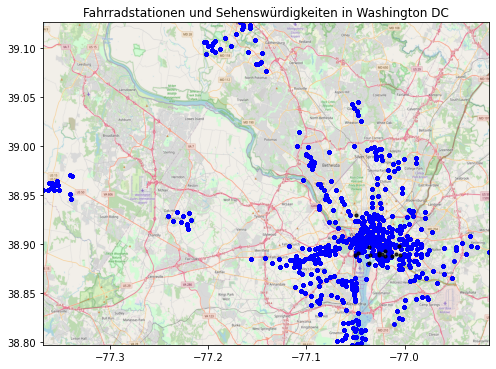

In [55]:
BBox = ((df_station_data_test.Longitude_start_station.min(),   df_station_data_test.Longitude_start_station.max(),      
         df_station_data_test.Latitude_start_station.min(), df_station_data_test.Latitude_start_station.max()))

map_w= plt.imread('../images/map.png')

# Sehenswürdigkeiten und Fahrradstationen in einer Karte darstellen
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_station_data_test.Longitude_start_station, df_station_data_test.Latitude_start_station, zorder=1, alpha= 0.5,c='blue', s=10)
ax.scatter(df_sights.Longitude, df_sights.Latitude, zorder=1, alpha= 0.8, c='black', s=10)
ax.set_title('Fahrradstationen und Sehenswürdigkeiten in Washington DC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_w, zorder=0, extent = BBox, aspect= 'equal');

In [56]:
# Das Ergebnis für die Weiterverwendung im Data Understanding Notebook speichern
df_station_data_test.to_pickle(DATA_PATH + 'airdistance_tripdata_coordinates.pkl')